In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean 
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import scipy as sp
import scipy.special 
import seaborn as sns
import scipy.ndimage
from matplotlib.gridspec import GridSpec
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':20})
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{mathrsfs}')
from matplotlib.gridspec import GridSpec

In [4]:
RC = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.edgecolor':' .15',
      'axes.linewidth':' 1.25',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.size' : 15,
     "xtick.major.size": 4, "ytick.major.size": 4}

plt.rcParams.update(RC)
sns.set_palette(sns.color_palette('dark'), n_colors=None, desat=None, color_codes=False)

In [5]:
#Define non-dimensional parameters for the simulation 
Re = 2.478883e+03
Fr = 1.105914e+00
Ri = 1/((Fr/(2*np.pi)))**2
Pr = 7
ch=50 #input column height

In [6]:
#Volume averaged mean quantities and ratios calculated from large scale simulation 
Reb_S = np.array([0.28270933, 0.10690117, 0.043700065,0.02458512, 0.018240754, 0.013079638])*Re/Ri
ratios_eps = np.array([3.6602726, 3.6112297, 2.9019969, 2.0862007, 1.7377182,1.4904842])
ratios_chi = np.array([2.889336, 2.7295, 2.1947887, 1.6820469, 1.4587915,1.3439991])

In [7]:
print(Reb_S)

[21.71096592  8.20958989  3.35599332  1.88804063  1.40081825  1.00446481]


In [8]:
#Define dimensionless functions f and g from equations (2.14) and (2.15) in the manuscript
#These can be easily modified by the user
a = 1
b = 0.8
c = 0.9
d = 0.9 
def f(x):
    return 19/8 + 11/8*np.tanh(a*np.log(x)-b)

def g(x):
    return 2 + np.tanh(c*np.log(x)-d)

In [9]:
x=np.linspace(1e-10,25,100)

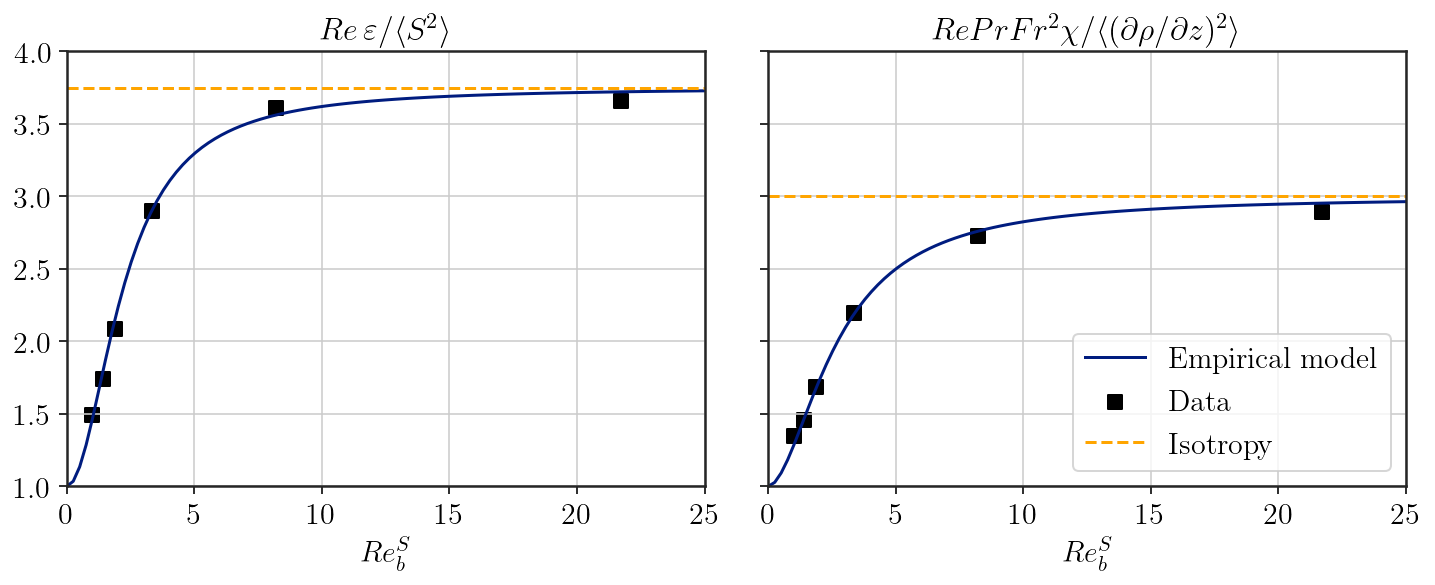

In [10]:
#Produce figure 1
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':15})
gs=GridSpec(1,2, width_ratios=[1,1], wspace=0.1, hspace=0.12)
fig=plt.figure(figsize=(12,4))
ax2=fig.add_subplot(gs[0,0]) 
ax1=fig.add_subplot(gs[0,1]) 

ax2.plot(x,f(x), label='$\\mathrm{Empirical\ model}$')
ax2.scatter(Reb_S, ratios_eps, marker='s', color='k', s=50, label='$\\mathrm{Data}$')
ax2.axhline(3.75, color='orange', linestyle='--', label='$\\mathrm{Isotropy}$')
ax2.set_xlim(0,25)
ax2.set_ylim(1,4)
ax2.set_xlabel('$Re_b^S$')
ax2.set_title('$Re\, \\varepsilon / \\langle S^2 \\rangle$',size=16)

ax1.plot(x,g(x), label='$\\mathrm{Empirical\ model}$')
ax1.scatter(Reb_S, ratios_chi, marker='s', color='k', s=50, label='$\\mathrm{Data}$')
ax1.axhline(3, color='orange', linestyle='--', label='$\\mathrm{Isotropy}$')
ax1.set_xlim(0,25)
ax1.set_ylim(1,4)
ax1.set_xlabel('$Re_b^S$')
ax1.set_yticklabels('')
# ax1.set_ylabel('$g$')
ax1.legend(loc='lower right')
ax1.set_title('$Re Pr Fr^2\\chi /\\langle (\partial \\rho/\partial z)^2 \\rangle $',size=16)
fig.show()